# Initialization

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as qubit

import numpy as np

# Double Cooper pair tunneling qubit (no disorder)

$H_\text{dcp}=4E_\text{C}[2n_\phi^2+\frac{1}{2}(n_\varphi-N_\text{g}-n_\theta)^2+xn_\theta^2]+E_\text{L}(\frac{1}{4}\phi^2+\theta^2)-2E_\text{J}\cos(\varphi)\cos(\frac{\phi}{2}+\frac{\varphi_\text{ext}}{2})$

In [4]:
dcp_qubit = qubit.Dcp(
    EJ = 15.0,
    EC = 2.0,
    EL = 1.0,
    x = 0.02,
    dC = 0,
    dL = 0,
    dJ = 0,
    Ng = 0.0,
    flux = 0.5,
    N0 = 10,
    q0 = 40,
    p0 = 10
)

In [5]:
print(dcp_qubit)

DCP
 ———— PARAMETERS ————
EJ	: 15.0
EC	: 2.0
EL	: 1.0
x	: 0.02
dL	: 0
dC	: 0
dJ	: 0
flux	: 0.5
Ng	: 0.0
N0	: 10
q0	: 40
p0	: 10
truncated_dim	: None
Hilbert space dimension	: 8400


## energy spectrum as a function of flux

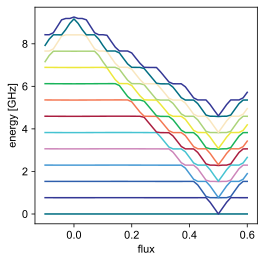

In [13]:
flux_list = np.linspace(-.1, .6, 50)
dcp_qubit.plot_evals_vs_paramvals('flux', flux_list, evals_count=14, subtract_ground=True, figsize=(4,4));

## energy spectrum as a function of $Ng$

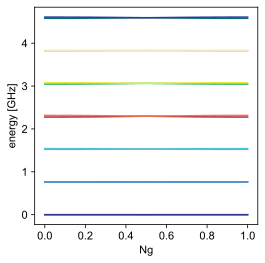

In [14]:
ng_list = np.linspace(0.0, 1.0, 50)
dcp_qubit.plot_evals_vs_paramvals('Ng', ng_list, evals_count=14, subtract_ground=True, figsize=(4,4));

## potential energy

[Text(0, 0, '-$\\pi$'), Text(0, 0, '$\\pi$')]

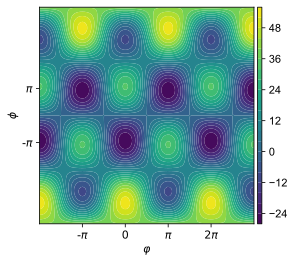

In [15]:
fig, axes = dcp_qubit.plot_potential(contour_vals=20, figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$\varphi$')
axes.set_xticks([-np.pi, 0, np.pi, 2*np.pi])
axes.set_xticklabels(['-$\pi$', '$0$', '$\pi$', '$2\pi$'])
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])

## wavefunction in $\phi$-$\varphi$ plane

[Text(0, 0, '-$\\pi$'), Text(0, 0, '$\\pi$')]

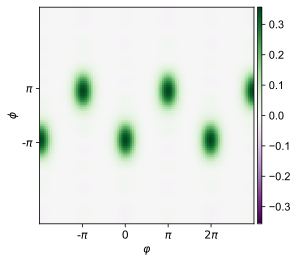

In [17]:
esys = dcp_qubit.eigensys()
fig, axes = dcp_qubit.plot_phi_varphi_wavefunction(esys, which=0, mode='real', zero_calibrate=True, figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$\varphi$')
axes.set_xticks([-np.pi, 0, np.pi, 2*np.pi])
axes.set_xticklabels(['-$\pi$', '$0$', '$\pi$', '$2\pi$'])
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])

## wavefunction along $n_\varphi$ axis

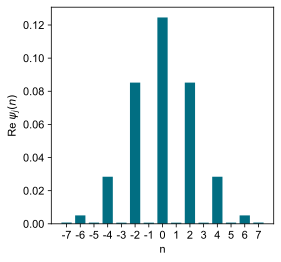

In [21]:
esys = dcp_qubit.eigensys()
fig, axes = dcp_qubit.plot_n_varphi_wavefunction(esys,which=0,figsize=(4,4))

## wavefunction $\phi$-$n_\varphi$ plane

[Text(0, 0, '-$\\pi$'), Text(0, 0, '$\\pi$')]

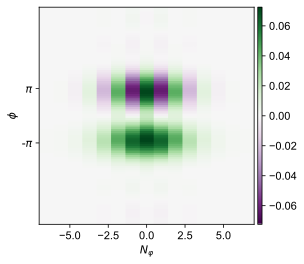

In [23]:
fig, axes = dcp_qubit.plot_phi_n_varphi_wavefunction(esys,mode='real',which=0,figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$N_\varphi$')
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])

## wavefunction $n_\phi$-$n_\varphi$ plane

(-2, 2)

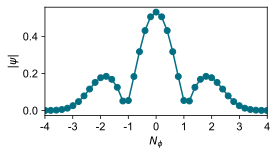

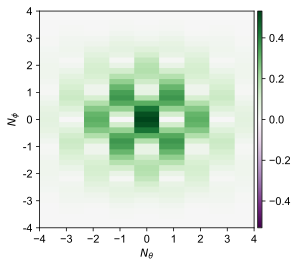

In [26]:
esys = dcp_qubit.eigensys()
fig, axes = dcp_qubit.plot_n_phi_n_varphi_wavefunction(esys,mode='abs',which=0,figsize=(4,4))
axes.set_ylabel(r'$N_\phi$')
axes.set_xlabel(r'$N_\theta$')
axes.set_yticks([-2,-1.5, -1,-0.5, 0,0.5, 1,1.5, 2])
axes.set_yticklabels(['-4','-3','-2','-1','0','1','2','3','4'])
axes.set_xticks([-4,-3, -2,-1, 0,1,2,3,4])
axes.set_xlim([-4,4])
axes.set_ylim([-2,2])

In [6]:
esys = dcp_qubit.eigensys()
ovp1,ovp2 = dcp_qubit._n_phi_n_varphi_wavefunction_overlap(esys)
print(ovp1)
print(ovp2)

0.00019907084323567581
0.00019881523168117674


## normalized matrix element

In [7]:
flux_list = np.linspace(0.4,0.6,51)

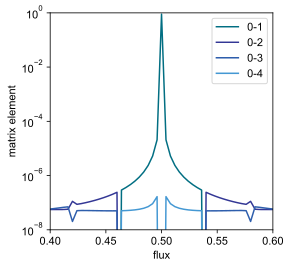

In [8]:
matele_1,matele_2,matele_3,matele_4  = dcp_qubit.plot_matele_norm('phi_operator', 'phi_phi_operator', 'flux',flux_list)

# Disorder

## relaxation due to inductive loss as a function of $dL$

In [9]:
dL_list = np.linspace(0.1, 0.9, 40)

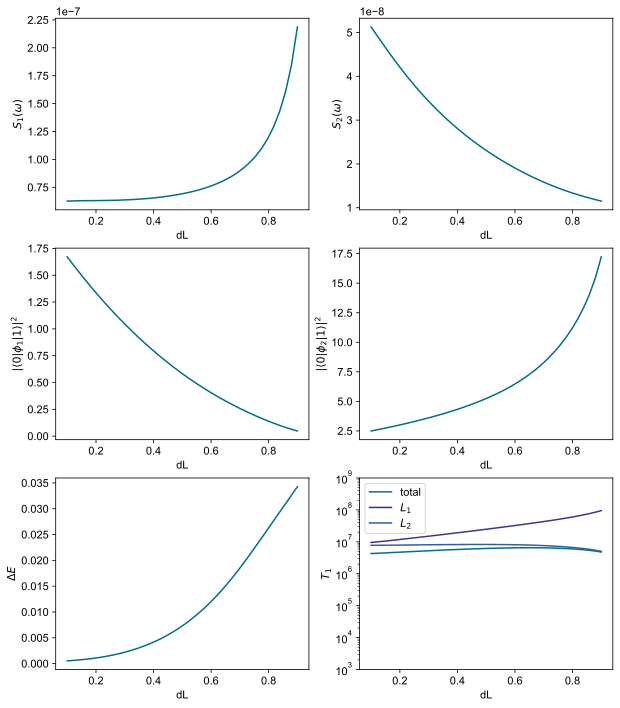

In [11]:
t1_list = dcp_qubit.t1_ind_loss(dL_list)

[Text(0, 0, '-$\\pi$'), Text(0, 0, '$\\pi$')]

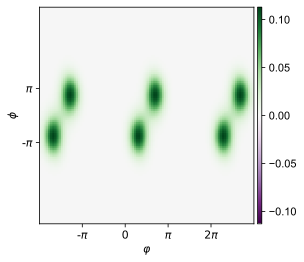

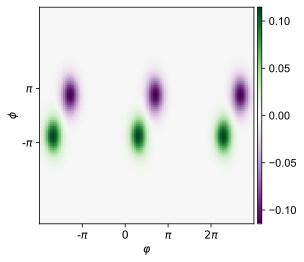

In [12]:
dcp_qubit.dL = 0.9
esys = dcp_qubit.eigensys()
fig, axes = dcp_qubit.plot_phi_varphi_wavefunction(esys, which=0, mode='real', zero_calibrate=True, figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$\varphi$')
axes.set_xticks([-np.pi, 0, np.pi, 2*np.pi])
axes.set_xticklabels(['-$\pi$', '$0$', '$\pi$', '$2\pi$'])
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])

fig, axes = dcp_qubit.plot_phi_varphi_wavefunction(esys, which=1, mode='real', zero_calibrate=True, figsize=(4,4))
axes.set_ylabel(r'$\phi$')
axes.set_xlabel(r'$\varphi$')
axes.set_xticks([-np.pi, 0, np.pi, 2*np.pi])
axes.set_xticklabels(['-$\pi$', '$0$', '$\pi$', '$2\pi$'])
axes.set_yticks([-np.pi, np.pi])
axes.set_yticklabels(['-$\pi$', '$\pi$'])